<a href="https://colab.research.google.com/github/louadi/NEASE-tutorials/blob/main/DCM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nease

 If you run this on google colab all you need to do is to upload your table containing list of events


In [1]:
#import nease
import nease

import pandas as pd


### Input of NEASE

In [2]:
# RNA-Seq data processed fron:  https://doi.org/10.1186/S13059-017-1286-Z
# Additional file 4 from the paper: Differential exon usage between DCM patients and controls.

table_dcm=pd.read_json('dcm.json')
table_dcm

,Gene stable ID,new_start,new_end,beta
0,ENSG00000154263,69314431,69315425,-0.105828
1,ENSG00000154265,69314431,69315425,-0.105828
2,ENSG00000005471,87411893,87412033,0.135682
3,ENSG00000197150,151031241,151031291,0.150763
4,ENSG00000124574,43431751,43432141,0.107582
...,...,...,...,...
1022,ENSG00000162086,3313049,3313175,0.131544
1023,ENSG00000198482,52547512,52547638,-0.104090
1024,ENSG00000176371,84616309,84616614,-0.246228
1025,ENSG00000140987,3397745,3397787,-0.161007


## Run NEASE


In [3]:
# Run nease with standard input.
events=nease.run(table_dcm, organism='Human')



You selected to remove all exons that are predicted to disturb the ORF or known to result in a non-coding gene.
If you would like to change this option and include all exons, please change the parameter remove_non_in_frame to False. 

47 Exons out of 1027 were removed.

		Data Summary
**************************************************
221 protein domains are affected by AS.

14 linear motifs are affected by AS.
29 interacting resiude are affected by AS.

111 of the affected domains/motifs have known interactions.
1028 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


### Classic gene enrichment

In [4]:
# This is an enrichement at gene level: all (diff) spliced genes.
# The function use the library gseapy and need gseapy_databases parameter 
# let first check what libraries are available on gseapy for Human

import gseapy as gp
Human = gp.get_library_name(organism='Human')
Human[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [5]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['KEGG_2019_Human'])
enr.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Oxytocin signaling pathway,20/153,0.000001,0.000253,0,0,3.960521,54.327432,CAMK2B;CAMK2D;CAMK1D;PLA2G4B;CACNA2D3;PRKAG2;NFATC1;CACNA1C;ADCY1;ADCY6;CAMKK2;GNAO1;CACNB2;RCAN1;MYL6;PLCB4;MAPK1;PPP1R12B;PLCB1;PRKACB
1,KEGG_2019_Human,Adrenergic signaling in cardiomyocytes,19/145,0.000002,0.000253,0,0,3.967512,52.134866,CAMK2B;CAMK2D;CACNA2D3;CREM;ATP2B4;CACNA1C;PPP2R5C;ADCY1;ADRA1A;ADCY6;CACNB2;PLCB4;CREB3L2;AKT1;MAPK1;PLCB1;PRKACB;CREB5;RAPGEF4
2,KEGG_2019_Human,cAMP signaling pathway,21/212,0.000047,0.003472,0,0,2.890941,28.788422,CHRM2;CAMK2B;GABBR1;CAMK2D;BDNF;PTCH1;PDE4D;PTGER3;PDE4C;ATP2B4;NFATC1;ADCY1;CACNA1C;ADCY6;CREB3L2;AKT1;PLCE1;MAPK1;PRKACB;RAPGEF4;CREB5
3,KEGG_2019_Human,Aldosterone synthesis and secretion,13/98,0.000070,0.003472,0,0,3.999631,38.236501,CAMK2B;SCARB1;CAMK2D;CAMK1D;ATP2B4;CACNA1C;ADCY1;ADCY6;PLCB4;CREB3L2;PLCB1;PRKACB;CREB5
4,KEGG_2019_Human,Cholinergic synapse,14/112,0.000073,0.003472,0,0,3.738486,35.614117,CHRM2;CAMK2B;CAMK2D;CACNA1C;ADCY1;ADCY6;GNAO1;PLCB4;CREB3L2;AKT1;MAPK1;PLCB1;PRKACB;CREB5
5,KEGG_2019_Human,Insulin secretion,12/86,0.000081,0.003472,0,0,4.237425,39.934022,CAMK2B;CAMK2D;PLCB4;CREB3L2;KCNMA1;ADCY1;CACNA1C;PLCB1;PRKACB;ADCY6;RAPGEF4;CREB5
6,KEGG_2019_Human,Morphine addiction,12/91,0.000141,0.005183,0,0,3.968199,35.195814,GNAO1;GABBR1;PDE1C;GRK4;PDE4D;PDE1A;PDE4C;ARRB1;ADCY1;GABRE;PRKACB;ADCY6
7,KEGG_2019_Human,Dilated cardiomyopathy (DCM),11/91,0.000566,0.015902,0,0,3.586973,26.820198,CACNB2;ITGB4;ITGA1;CACNA2D3;DMD;ADCY1;CACNA1C;IGF1;PRKACB;ADCY6;TTN
8,KEGG_2019_Human,"Parathyroid hormone synthesis, secretion and action",12/106,0.000590,0.015902,0,0,3.332367,24.775598,PLCB4;PDE4D;CREB3L2;PDE4C;MAPK1;ARRB1;ADCY1;PLCB1;PRKACB;ADCY6;FGFR1;CREB5
9,KEGG_2019_Human,Cortisol synthesis and secretion,9/65,0.000656,0.015902,0,0,4.186422,30.683743,SCARB1;PLCB4;CREB3L2;ADCY1;CACNA1C;PLCB1;PRKACB;ADCY6;CREB5


### NEASE analysis


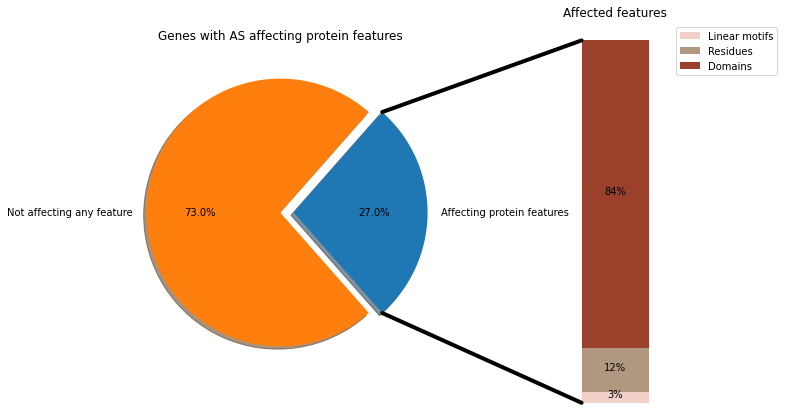

In [6]:
# get stats of the data
events.get_stats()


In [7]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

domains=events.get_domains()
domains.head(10)

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,ZC3HAV1,56829,ENSG00000105939,ENSE00001939369,PF02825,-0.675285,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001939369
1,PLXNA4,91584,ENSG00000221866,ENSE00001477854,PF01403,-0.579010,False,None,
2,ALS2,57679,ENSG00000003393,ENSE00001844466,PF00415,-0.510964,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001844466
3,XRN1,54464,ENSG00000114127,ENSE00001810566,PF17846,-0.479034,False,None,
4,ZNF655,79027,ENSG00000197343,ENSE00003602592,PF01352,-0.458799,False,None,
5,NFASC,23114,ENSG00000163531,ENSE00001556394,PF07679,-0.433055,False,None,
6,MCM9,254394,ENSG00000111877,ENSE00001356493,PF00493,-0.428684,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001356493
7,DENND1B,163486,ENSG00000213047,ENSE00001196169,PF03455,-0.425418,False,None,
8,ALG13,79868,ENSG00000101901,ENSE00003760070,PF04101,-0.411372,False,None,
9,NUP98,4928,ENSG00000110713,ENSE00002163402,PF04096,-0.410950,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002163402


In [8]:
# get the affected linear motifs
events.get_elm()

,Gene name,entrezgene,Gene stable ID,ELMIdentifier,dPSI,ELM link
0,BCL2L11,10018,ENSG00000153094,LIG_Dynein_DLC8_1,-0.106673,http://elm.eu.org/elms/LIG_Dynein_DLC8_1
1,BRCA1,672,ENSG00000012048,MOD_PKB_1,0.106918,http://elm.eu.org/elms/MOD_PKB_1
2,BRCA1,672,ENSG00000012048,TRG_NLS_MonoExtN_4,0.106918,http://elm.eu.org/elms/TRG_NLS_MonoExtN_4
3,BRCA1,672,ENSG00000012048,TRG_NLS_MonoExtC_3,0.106918,http://elm.eu.org/elms/TRG_NLS_MonoExtC_3
4,BRCA1,672,ENSG00000012048,TRG_NLS_MonoCore_2,0.106918,http://elm.eu.org/elms/TRG_NLS_MonoCore_2
5,BRCA1,672,ENSG00000012048,DOC_PP1_RVXF_1,0.106918,http://elm.eu.org/elms/DOC_PP1_RVXF_1
6,ZHX1,11244,ENSG00000165156,LIG_SUMO_SIM_par_1,0.159270,http://elm.eu.org/elms/LIG_SUMO_SIM_par_1
7,ELK4,2005,ENSG00000158711,DOC_MAPK_FxFP_2,-0.141280,http://elm.eu.org/elms/DOC_MAPK_FxFP_2
8,ELK4,2005,ENSG00000158711,MOD_ProDKin_1,-0.141280,http://elm.eu.org/elms/MOD_ProDKin_1
9,ELK4,2005,ENSG00000158711,DOC_MAPK_gen_1,-0.141280,http://elm.eu.org/elms/DOC_MAPK_gen_1


In [9]:
# get interacting residues affected by AS
events.get_pdb()

,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,RRAGB,10325,ENSG00000083750,DEPDC5,9681
1,RALGPS1,9649,ENSG00000136828,RALGPS1,9649
2,BRCC3,79184,ENSG00000185515,BABAM2,9577
3,CNOT1,23019,ENSG00000125107,CNOT9,9125
4,LATS1,9113,ENSG00000131023,"MOB1B,LATS1,MOB1A","92597,9113,55233"
5,XIAP,331,ENSG00000101966,"DIABLO,CASP9,CASP3,XIAP,TAB1","56616,842,836,331,10454"
6,CNNM2,54805,ENSG00000148842,PTP4A1,7803
7,RWDD3,25950,ENSG00000122481,UBE2I,7329
8,ELK4,2005,ENSG00000158711,SRF,6722
9,SKP2,6502,ENSG00000145604,"SKP1,CKS1B","6500,1163"


In [10]:
# List of affected interactions (domain and motifs binding)
edges=events.get_edges()
edges.head(10)

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,WWP2,11060,PF00397,-0.185343,98,"SRSF1,NCBP2,HNRNPA0,DAZAP1,TXNIP,POLR2C,NCL,WWP2,CPSF6,SNRNP70,U2AF2,ELAVL1,SRPK2,LIN7C,ITCH,DVL1,ZNF638,ARRDC3,HNRNPC,EIF3G,CSNK2A1,PTBP1,PATJ,RBM10,HNRNPF,HNRNPH1,RBM14,SRPK1,MYC,HNRNPD,KHSRP,ARRDC4,SHC1,IQGAP1,LARP7,HNRNPH3,PDLIM7,RBM28,IGF2BP1,SRSF10,SF3B4,TAGLN2,U2SURP,SMAD3,SRSF2,TP73,RBM39,HNRNPR,SFPQ,CTNNB1,SRSF3,IGF2BP2,OGT,HNRNPA1,HNRNPM,SNRPB2,DVL2,SAFB,NIFK,HNRNPL,AMOT,PABPC1,HNRNPA2B1,NELFE,RALY,HNRNPA3,WWP1,EIF3B,SYNCRIP,SCNN1B,G3BP1,RPAP3,EWSR1,FLNA,NONO,SRSF7,SCNN1G,SCNN1A,CDK9,POLR2A,PABPC4,SART3,SRSF5,G3BP2,STAT3,MKNK2,ARRDC1,U2AF1,ALYREF,CPSF7,RBM34,TJP1,TAF15,RBM17,RBMX,MPP5,TRA2A,SRSF6","6426,22916,10949,26528,10628,5432,4691,11060,11052,6625,11338,1994,6733,55327,83737,1855,27332,57561,3183,8666,1457,5725,10207,8241,3185,3187,10432,6732,4609,3184,8570,91947,6464,8826,51574,3189,9260,55131,10642,10772,10262,8407,23350,4088,6427,7161,9584,10236,6421,1499,6428,10644,8473,3178,4670,6629,1856,6294,84365,3191,154796,26986,3181,7936,22913,220988,11059,8662,10492,6338,10146,79657,2130,2316,4841,6432,6340,6337,1025,5430,8761,9733,6430,9908,6774,2872,92714,7307,10189,79869,23029,7082,8148,84991,27316,64398,29896,6431"
1,ESR2,2100,PF00104,-0.302430,80,"TLK2,PIK3R4,NCAM2,ADNP,CIT,ARNT,RPS6KB2,FNDC3B,ZHX2,CLK3,CAMK2D,SRPK2,PEAK1,PRKCI,RPS6KB1,CSNK1A1,WNK1,TBK1,TAOK2,DAPK3,CSNK2A1,MINK1,GAK,NR2F6,CDK13,SRPK1,ZFHX3,ZHX3,MAPK3,LMX1B,ESR1,MARK2,EIF2AK2,CDK11B,SCYL1,TRIO,MARK3,KPNA1,PKP4,NCOA3,CTNNB1,CUX1,PRPF4B,CERS2,CDK8,VRK2,CDC42BPG,MAPKAPK2,SCYL2,TTK,PBX1,MID1,MAPK1,MYLK2,PTPRK,MEOX2,NRIP1,NR2F2,ESR2,OXSR1,DYRK1A,CDK12,NKX2,SIX4,ESRRB,CDK9,STK26,PTPRF,MKNK2,BMP2K,NCOA2,CDK19,RPS6KA4,CSNK1G3,CDC42BPB,NCOA1,PRAG1,EPHA4,PA2G4,ARVCF","11011,30849,4685,23394,11113,405,6199,64778,22882,1198,817,6733,79834,5584,6198,1452,65125,29110,9344,1613,1457,50488,2580,2063,8621,6732,463,23051,5595,4010,2099,2011,5610,984,57410,7204,4140,3836,8502,8202,1499,1523,8899,29956,1024,7444,55561,9261,55681,7272,5087,4281,5594,85366,5796,4223,8204,7026,2100,9943,1859,51755,159296,51804,2103,1025,51765,5792,2872,55589,10499,23097,8986,1456,9578,8648,157285,2043,5036,421"
2,CLK1,1195,PF00069,0.140012,71,"H2BC12,SRSF3,MAP3K21,CDK12,SRSF1,PRPF4B,SRSF7,TRA2B,HNRNPA1,ISG15,CUL3,HNRNPA0,ANKFY1,SRPK1,MFHAS1,FAT1,PATZ1,SAFB,CENPE,RLF,MYOM1,SFMBT2,THY1,CLK1,SRSF5,STIP1,NCL,BAG3,YWHAG,PPFIBP2,ARHGEF12,SPEN,PPIG,SVOP,RASL12,KIF14,NPM1,STK31,WDR66,GRM6,HTATSF1,CTNND2,DNAJC13,CWC27,RBM15,KIF23,HNRNPA3,AC020929.1,GEMIN5,ZNF148,SRPK2,IMPDH2,ABCA13,PPP1CB,DNAJC24,MKRN2,UBL5,DBR1,CLK2,UNC13B,KRT8,TJP2,RBMX,PTPN22,RAPH1,HIVEP1,TRA2A,RBM39,SRSF6,PHLDB2,CELSR3","85236,6428,6426,84451,51755,8899,6432,6434,3178,9636,8452,10949,51479,6732,9258,2195,23598,90102,6294,1062,6018,8736,57713,7070,1195,6430,10963,4691,9531,7532,8495,23365,23013,9360,55530,51285,9928,4869,56164,2916,27336,1501,23317,10283,64783,9493,220988,57731,25929,7707,6733,3615,154664,5500,120526,23609,59286,51163,1196,10497,3856,9414,27316,26191,65059,3096,29896,9584,6431,144406,1951"
3,FGFR1,2260,PF00047,0.119626,53,"PLCG1,HEPACAM2,YES1,GRB14,CD79B,NCAM1,AKT1,PTPN11,NCK1,AGER,MFHAS1,CEACAM21,CDK9,RPS6KA3,SLA,OPCML,VAV1,PLCG2,SHC1,PIK3R1,JAK2,FGFR2,SRC,IL27RA,PDGFRB,STAT3,SCN3B,RASA1,PTK6,ITK,ANOS1,FGFR1,LTBR,SH3BP2,DLK1,PIK3R2,PTPN1,TNS2,L1CAM,NECTIN1,LRRN2,SHB,RPS6KA1,NCK2,CRK,SHE,CRKL,RAET1E,TNFRSF10B,AP006333.1,FCGRT,EPHA4,CTNNB1","5335,253012,7525,2888,974,4684,207,5781,4690,177,9258,90273,6197,1025,4978,6503,7409,5336,6464,5295,3717,2217,6714,9466,5159,6774,55800,5921,5753,3702,3730,2260,4055,6452,8788,5296,5770,23371,3897,5818,10446,6461,6195,8440,1398,126669,1399,135250,8795,23769,2263,2043,1499"
4,MYO19,80179,PF00063,-0.154152,51,"MYO1C,MYLK,ACTR2,CORO2A,INF2,CORO1C,TPM1,MYL6,ACTN1,TPM4,MYO5C,PHKG2,IQGAP1,ACTN4,MAPK14,MYO18A,AHNAK,MYO1E,ERBIN,ARPC1B,SPTAN1,MYL2,BMP2K,CORO1B,SPTBN2,MYL10,MYL12A,LMO7,CTTN,TJP1,SPTBN1,MYO10,TPM2,MYO5A,MYH9,MYO6,ACTG1,

### NEASE edge enrichment 

In [11]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG']).sort_values('p_value')
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 3 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
1,path:hsa04080,Neuroactive ligand-receptor interaction - Homo sapiens (human),KEGG,"PTGER3 (1), GABBR1 (1), CLK1 (1), ARRB1 (11), ADRA1A (2), GNAO1 (7)",0.000002,0.000551,12.888861
0,path:hsa04261,Adrenergic signaling in cardiomyocytes - Homo sapiens (human),KEGG,"PPP2R5C (9), ESR2 (3), ERBB3 (2), TTN (1), USP49 (1), ZHX1 (1), GRK4 (1), MYO19 (6), ELK4 (2), CLK1 (1), SPTAN1 (1), ARRB1 (2), FGFR1 (1), XIAP (1), MAF (1), ADRA1A (2), CACNA1C (2), GNAO1 (4), BRCA1 (8)",0.000008,0.001254,13.508347
2,path:hsa04022,cGMP-PKG signaling pathway - Homo sapiens (human),KEGG,"PPP2R5C (3), ESR2 (3), ERBB3 (1), TTN (2), NFATC1 (1), NPR3 (1), ZHX1 (1), GRK4 (1), MYO19 (1), ELK4 (3), CLK1 (1), SPTAN1 (1), ARRB1 (4), FGFR1 (1), XIAP (1), PPP1R12B (1), MAF (1), ADRA1A (2), CACNA1C (1), GNAO1 (5), BRCA1 (6), RAP1GDS1 (1)",0.000157,0.016794,10.756143
5,path:hsa04520,Adherens junction - Homo sapiens (human),KEGG,"IL1RAP (1), HERC2 (2), ESR2 (5), ERBB3 (2), PRDM2 (2), RCOR3 (1), MAGIX (1), TTN (3), PCDH1 (1), CSNK2A3 (3), WWP2 (5), NCAM1 (1), TNC (1), ZHX1 (1), MYO19 (6), APBB3 (1), ELK4 (2), PTPN18 (1), SPTAN1 (2), FGFR1 (6), BRCA1 (4), RAP1GDS1 (1)",0.000673,0.053855,8.971383
3,path:hsa04810,Regulation of actin cytoskeleton - Homo sapiens (human),KEGG,"HERC2 (1), PPP2R5C (3), CXCL12 (2), ESR2 (3), ERBB3 (2), PRDM2 (1), GIT2 (1), TTN (6), PTGER3 (2), WWP2 (1), NCAM1 (1), TNC (2), MYO19 (11), APBB3 (1), TSSK1B (1), ELK4 (2), PTPN18 (1), CLK1 (2), SPTAN1 (3), FGFR1 (9), USP53 (1), PPP1R12B (1), ABI2 (4), GNAO1 (1), BRCA1 (5), RAP1GDS1 (1)",0.001124,0.071965,9.780929
4,path:hsa04510,Focal adhesion - Homo sapiens (human),KEGG,"ZC3HAV1 (1), HERC2 (2), PPP2R5C (3), ESR2 (4), ERBB3 (4), PRDM2 (1), TTN (5), PTGER3 (2), FLT1 (2), WWP2 (3), HGF (1), TNC (2), ZHX1 (2), MYO19 (7), APBB3 (1), ELK4 (3), PTPN18 (2), CLK1 (1), SPTAN1 (3), FGFR1 (10), USP53 (2), XIAP (5), PPP1R12B (1), BRCA1 (7), RAP1GDS1 (1)",0.001886,0.093997,9.437541
9,path:hsa04020,Calcium signaling pathway - Homo sapiens (human),KEGG,"HERC2 (1), CXCL12 (1), ESR2 (2), ERBB3 (5), TTN (1), USP49 (1), PTGER3 (1), TNC (1), GRK4 (1), MYO19 (2), APBB3 (1), PTPN18 (1), ARRB1 (4), FGFR1 (3), ADRA1A (2), CACNA1C (2), GNAO1 (2), BRCA1 (1)",0.002056,0.093997,6.008179
6,path:hsa05168,Herpes simplex infection - Homo sapiens (human),KEGG,"NUP98 (1), IL1RAP (1), HERC2 (2), PPP2R5C (3), ESR2 (4), ERBB3 (3), PRDM2 (1), TTN (1), TRIM9 (1), RBM12 (1), CSNK2A3 (3), FLT1 (1), WWP2 (10), SP100 (1), ZHX1 (1), MBP (1), ELK4 (1), CLK1 (7), SPTAN1 (2), RBM41 (2), FBXO44 (1), FGFR1 (3), XIAP (7), MAF (1), BRCA1 (6), SKP2 (1)",0.003316,0.132638,7.840522
7,path:hsa04066,HIF-1 signaling pathway - Homo sapiens (human),KEGG,"ESR2 (7), ERBB3 (4), PRDM2 (1), TTN (3), PTGER3 (2), FLT1 (1), WWP2 (2), NPR3 (1), EIF4EBP3 (2), TNC (1), ZHX1 (1), APBB3 (1), ELK4 (2), PTPN18 (1), FGFR1 (7), XIAP (1), GNAO1 (1), BRCA1 (4)",0.005648,0.200805,6.358679
15,path:hsa04742,Taste transduction - Homo sapiens (human),KEGG,"ERBB3 (1), USP49 (1), WWP2 (3), GABBR1 (1), GNAO1 (1)",0.006309,0.201876,4.919493


### Pathway specific analysis

In [12]:
# Dilated cardiomyopathy (DCM) - Homo sapiens (human) is 7 on the list
# run path_analysis() with DCM pathway id for more details about diff. spliced genes are their affected interactions
events.path_analysis('path:hsa05414')

Enrichment of the pathway: Dilated cardiomyopathy (DCM) - Homo sapiens (human).

Overall p_value:  0.0198055308545215




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,MYO19,80179,False,6/51,0.000002,"TPM1,TPM4,MYL2,TPM2,ACTG1,TPM3","7168,7171,4633,7169,71,7170"
1,OBSCN,84033,False,1/2,0.014457,TTN,7273
2,USP49,25862,False,1/4,0.028706,PRKACA,5566
3,CACNA1C,775,True,1/4,0.028706,RYR2,6262
4,ERBB3,2065,False,1/18,0.122847,PRKACA,5566
5,ARRB1,408,False,1/21,0.141803,ADRB1,153
6,TTN,7273,True,1/24,0.160349,MYBPC3,4607
7,SPTAN1,6709,False,1/35,0.224993,MYH7,4625
8,BRCA1,672,False,1/38,0.241744,TTN,7273


In [13]:
# the gene MYO10 and OBSCN looks interesting, let us see what domain got affected and if the psi is positive or negative
events.get_edges()[ events.get_edges() ['Gene name']=='OBSCN' ]

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
95,OBSCN,84033,PF07679,-0.191164,2,"TTN,ANK1","7273,286"


In [14]:
events.get_edges()[ events.get_edges() ['Gene name']=='CACNA1C' ]

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
49,CACNA1C,775,PF00520,0.100241,4,"RYR2,CALM1,CABP1,SRI","801,9478,6717,6262"


### Visualization

In [15]:
# Finally we can visualize affected pathways with nease
# Again we run it on DCM pathway
# you can run this function several times to get a  better visualization

events.Vis_path('path:hsa05414',k=0.8)

Enrichment of the pathway: Dilated cardiomyopathy (DCM) - Homo sapiens (human).

Overall p_value:  0.0198055308545215


Visualization of the pathway generated in: Dilated cardiomyopathy (DCM) - Homo sapiens (human).html
